1. File creation and import. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn as sk



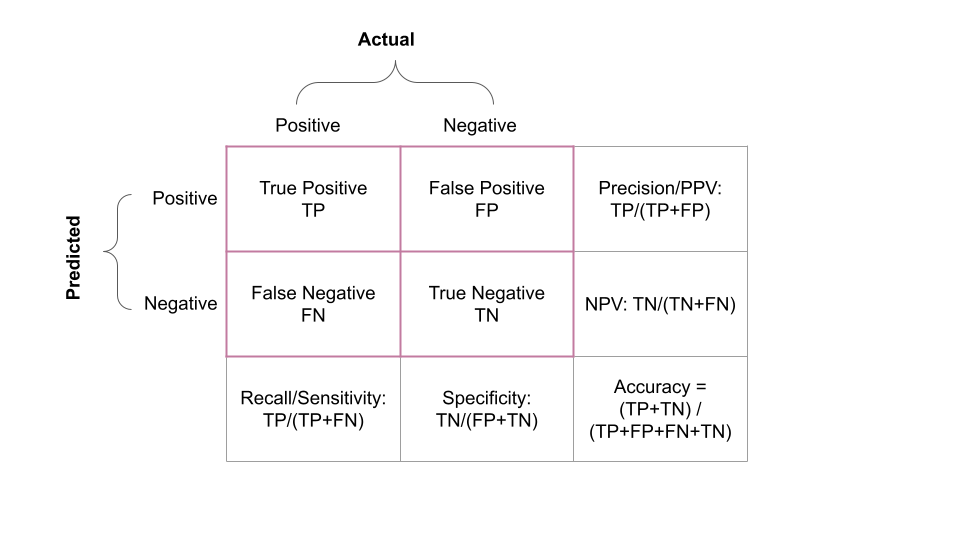

In [2]:
# Note, the baseline prediction is the most common class in our prediction.
# Positive and negative cases are up to interpretation, dependent upon the needs of the problem.
# In this case, there's no reason to choose one over the other.
# Hence, I'm making doggos my positive choice. 

2.) Given the following confusion matrix, evaluate (by hand) the model's performance.
|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |

- In the context of this problem, what is a false positive?      

- In the context of this problem, what is a false negative?       

- How would you describe this model?       


In [3]:
raining_cats_and_dogs = pd.DataFrame({'pred_dog': [46, 13], 'pred_cat': [7, 34]}, index=['actual_dog', 'actual_cat'])
raining_cats_and_dogs

,pred_dog,pred_cat
actual_dog,46,7
actual_cat,13,34


In [4]:
puppy_love = pd.DataFrame([['True Positive', 'False Negative'], ['False Positive', 'True Negative']], columns=raining_cats_and_dogs.columns, index=raining_cats_and_dogs.index)
puppy_love
# True Positive: The animal was identified as a dog, and is truly a canine. 
# False Positive: The animal was identified as a dog, but is a cat that knocked my beer off the counter. 
# False Negative: The animal was identified as a cat, but it ate my homework and started barking. 
# True Negative: The animal was identified as a cat, and it purred as it rubbed its head against my shin. 

,pred_dog,pred_cat
actual_dog,True Positive,False Negative
actual_cat,False Positive,True Negative


In [5]:
puppy_love + ': ' + raining_cats_and_dogs.values.astype(str)

,pred_dog,pred_cat
actual_dog,True Positive: 46,False Negative: 7
actual_cat,False Positive: 13,True Negative: 34


In [6]:
from fractions import Fraction

# Doing these by hand and then via python. 
TP, TN, FP, FN = 46, 34, 13, 7

# Recall/Sensitivity: TP / (TP + FN)
recall = TP / (TP + FN)

# Specificity: TN / (FP + TN)
specificity = TN / (FP + TN)

# Accuracy = (TP + TN) / (FP + TP + FN + TN)
accuracy = (TP + TN) / (FP + TP + FN + TN)

# Precision/Positive Predictive Value: TP / (TP + FP)
precision = TP / (TP + FP)

# Negative Predictive Value: TN / (TN + FN)
npv = TN / (TN + FN)

print(f' Recall: {round(recall, 5)} : {round(Fraction(recall),2)}')
print(f' Specificity: {round(specificity, 5)} : {round(Fraction(specificity),2)}')
print(f' Accuracy: {round(accuracy, 5)} : {round(Fraction(accuracy),2)}')
print(f' Precision: {round(precision, 5)} : {round(Fraction(precision),2)}')
print(f' Negative Predictive Value: {round(npv, 5)} : {round(Fraction(npv),2)}')

print('----------------------------------------------')
print('This model is fairly accurate, rated at 80%. \n Recall is higher than precision.')

 Recall: 0.86792 : 87/100
 Specificity: 0.7234 : 18/25
 Accuracy: 0.8 : 4/5
 Precision: 0.77966 : 39/50
 Negative Predictive Value: 0.82927 : 83/100
----------------------------------------------
This model is fairly accurate, rated at 80%. 
 Recall is higher than precision.


3.) You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

Use the predictions dataset and pandas to help answer the following questions:

- An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?       
___
- Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

In [7]:
cody = pd.read_csv('c3.csv')
cody

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
...,...,...,...,...
195,No Defect,No Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect
197,No Defect,No Defect,No Defect,No Defect
198,No Defect,No Defect,Defect,Defect


In [8]:
print(f'{cody.actual.value_counts()}')
print(f'{cody.model1.value_counts()}')
print(f'{cody.model2.value_counts()}')
print(f'{cody.model3.value_counts()}')

No Defect    184
Defect        16
Name: actual, dtype: int64
No Defect    190
Defect        10
Name: model1, dtype: int64
No Defect    110
Defect        90
Name: model2, dtype: int64
No Defect    101
Defect        99
Name: model3, dtype: int64


In [9]:
print(f' Defects act as the positive class for classification.')
print(f' Recall will demonstrate the amount of defective ducks correctly flagged as defective by the models')
 
print('----------------------------------------')
subset = cody[cody.actual == 'Defect']
print(subset)
print('----------------------------------------')

# Defects from the first model
(subset.model1 == subset.actual).mean()
print (f' The Recall Rate of Model 1 = 50%')

# Defects from the second model
(subset.model2 == subset.actual).mean()
print (f' The Recall Rate of Model 2 = ~56%')

# Defects from the third model
(subset.model3 == subset.actual).mean()
print (f' The Recall Rate of Model 3 = ~81%')

print('----------------------------------------')
print('The Third Model would incur the least number of False Negatives, as per its high recall value.')

 Defects act as the positive class for classification.
 Recall will demonstrate the amount of defective ducks correctly flagged as defective by the models
----------------------------------------
     actual     model1     model2     model3
13   Defect  No Defect     Defect     Defect
30   Defect     Defect  No Defect     Defect
65   Defect     Defect     Defect     Defect
70   Defect     Defect     Defect     Defect
74   Defect  No Defect  No Defect     Defect
87   Defect  No Defect     Defect     Defect
118  Defect  No Defect     Defect  No Defect
135  Defect     Defect  No Defect     Defect
140  Defect  No Defect     Defect     Defect
147  Defect     Defect  No Defect     Defect
163  Defect     Defect     Defect     Defect
171  Defect  No Defect     Defect     Defect
176  Defect  No Defect     Defect     Defect
186  Defect  No Defect  No Defect  No Defect
194  Defect     Defect  No Defect     Defect
196  Defect     Defect  No Defect  No Defect
---------------------------------------

In [10]:
# Vacation time.  False positives must be avoided. Precision is key. 

# subset of model1 where we only select 'positive predictions'
subset = cody[cody.model1 == 'Defect']

# calculate precision
model_precision = (subset.actual == subset.model1).mean()
print(f" Model 1's Precision: {model_precision: .2%}")

subset2 = cody[cody.model2 == 'Defect']
model_precision2 = (subset2.actual == subset2.model2).mean()
print(f" Model 2's Precision: {model_precision2: .2%}")

subset3 = cody[cody.model3 == 'Defect']
model_precision3 = (subset3.actual == subset3.model3).mean()
print(f" Model 3's Precision: {model_precision3: .2%}")

print("""
Model 1's high precision makes it an excellent option for only providing vacation 
to those whose product is truly defective""")

 Model 1's Precision:  80.00%
 Model 2's Precision:  10.00%
 Model 3's Precision:  13.13%

Model 1's high precision makes it an excellent option for only providing vacation 
to those whose product is truly defective


4.) You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Several models have already been developed with the data, and you can find their results here.

Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:

- In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?
- Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?
- Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?

In [2]:
paws = pd.read_csv('gives_you_paws.csv')
paws.actual.value_counts()
# dog is most frequent, so it is the baseline
paws["baseline"] = paws.actual.value_counts().idxmax()
paws.head()

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog


In [3]:
models = list(paws.columns)
models = models[1:]
print(models)

# Doggy Dictionary Accuracy Edition
output = {}
for model in models:
    accuracy = (paws.actual == paws[model]).mean()
    output.update({model:accuracy})
    
output

['model1', 'model2', 'model3', 'model4', 'baseline']


{'model1': 0.8074,
 'model2': 0.6304,
 'model3': 0.5096,
 'model4': 0.7426,
 'baseline': 0.6508}

In [4]:
# Turn the doggy dictionary into a data frame
good_dawg = pd.DataFrame(output.items(), columns = ['model', 'accuracy'] )
print(f' {good_dawg}')
print('-----------------------')
print('Models 2 and 4 are more accurate than the baseline')

       model  accuracy
0    model1    0.8074
1    model2    0.6304
2    model3    0.5096
3    model4    0.7426
4  baseline    0.6508
-----------------------
Models 2 and 4 are more accurate than the baseline


In [5]:
#Suppose you are working on a team that solely deals with dog pictures. 
# Which of these models would you recomend for Phase I? For Phase II?
# Doggo is the positive
# Phase 1 suits Recall

subset = paws[paws.actual == 'dog']
subset.head()


,actual,model1,model2,model3,model4,baseline
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
5,dog,dog,dog,dog,dog,dog
8,dog,dog,cat,dog,dog,dog


In [15]:
# calculate Recall
model1_recall = (subset.actual == subset.model1).mean()
print(f" Model 1's Recall: {model1_recall: .2%}")

model2_recall = (subset.actual == subset.model2).mean()
print(f" Model 2's Recall: {model2_recall: .2%}")

model3_recall = (subset.actual == subset.model3).mean()
print(f" Model 3's Recall: {model3_recall: .2%}")

model4_recall = (subset.actual == subset.model4).mean()
print(f" Model 4's Recall: {model4_recall: .2%}")
print('-----------------------------')
print("Model 4 is best for Phase I")

 Model 1's Recall:  81.50%
 Model 2's Recall:  89.06%
 Model 3's Recall:  51.15%
 Model 4's Recall:  34.54%
-----------------------------
Model 4 is best for Phase I


In [ ]:
# Phase II needs to minimize false positives, so precision fits. 

In [8]:
s1 = paws[paws.model1 == 'dog']
s2 = paws[paws.model2 == 'dog']
s3 = paws[paws.model3 == 'dog']
s4 = paws[paws.model4 == 'dog']

In [16]:
m1 = (s1.actual == s1.model1).mean()
m2 = (s2.actual == s2.model2).mean()
m3 = (s3.actual == s3.model3).mean()
m4 = (s4.actual == s4.model4).mean()

print(f" Precision of Model 1: {m1: .3%}")
print(f" Precision of Model 2: {m2: .3%}")
print(f" Precision of Model 3: {m3: .3%}")
print(f" Precision of Model 4: {m4: .3%}")
print('--------------------------------')
print('Model 2 takes the cake for Phase II')
pd.crosstab(paws.model2, paws.actual)


 Precision of Model 1:  89.002%
 Precision of Model 2:  89.318%
 Precision of Model 3:  65.989%
 Precision of Model 4:  73.125%
--------------------------------
Model 2 takes the cake for Phase II


actual,cat,dog
model2,,
cat,1555,1657
dog,191,1597


The next prompt is very similar, just focusing on cat images rather than dogs. 

In [14]:
subset = paws[paws.actual == 'cat']

# calculate Recall
model1_recall = (subset.actual == subset.model1).mean()
print(f" Model 1's Recall: {model1_recall: .2%}")

model2_recall = (subset.actual == subset.model2).mean()
print(f" Model 2's Recall: {model2_recall: .2%}")

model3_recall = (subset.actual == subset.model3).mean()
print(f" Model 3's Recall: {model3_recall: .2%}")

model4_recall = (subset.actual == subset.model4).mean()
print(f" Model 4's Recall: {model4_recall: .2%}")
print('-----------------------------')
print("Model 2 is best for Phase I")

 Model 1's Recall:  81.50%
 Model 2's Recall:  89.06%
 Model 3's Recall:  51.15%
 Model 4's Recall:  34.54%
-----------------------------
Model 2 is best for Phase I


In [17]:
s1 = paws[paws.model1 == 'cat']
s2 = paws[paws.model2 == 'cat']
s3 = paws[paws.model3 == 'cat']
s4 = paws[paws.model4 == 'cat']

In [19]:
m1 = (s1.actual == s1.model1).mean()
m2 = (s2.actual == s2.model2).mean()
m3 = (s3.actual == s3.model3).mean()
m4 = (s4.actual == s4.model4).mean()

print(f" Precision of Model 1: {m1: .2%}")
print(f" Precision of Model 2: {m2: .2%}")
print(f" Precision of Model 3: {m3: .2%}")
print(f" Precision of Model 4: {m4: .2%}")
print('--------------------------------')
print('Model 4 takes the cake for Phase II')
pd.crosstab(paws.model2, paws.actual)



 Precision of Model 1:  68.98%
 Precision of Model 2:  48.41%
 Precision of Model 3:  35.83%
 Precision of Model 4:  80.72%
--------------------------------
Model 4 takes the cake for Phase II


actual,cat,dog
model2,,
cat,1555,1657
dog,191,1597


5.) Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

- sklearn.metrics.accuracy_score
- sklearn.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.classification_report

In [22]:
from sklearn.metrics import classification_report

x = classification_report(paws.actual, paws.model1,
                          labels = ['cat', 'dog'],
                          output_dict=True)
pd.DataFrame(x).T



,precision,recall,f1-score,support
cat,0.689772,0.815006,0.747178,1746.0000
dog,0.890024,0.803319,0.844452,3254.0000
accuracy,0.807400,0.807400,0.807400,0.8074
macro avg,0.789898,0.809162,0.795815,5000.0000
weighted avg,0.820096,0.807400,0.810484,5000.0000
